In [43]:
import numpy as np
import sys 
sys.path.append('../../../')
from stateinterpreter.numerical_utils import gaussian_kde
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import minimize
from tqdm import tqdm

In [89]:
dims = 2
mean_val = np.random.rand(2)*10
cov = np.random.rand(2,2)
cov = cov@cov.T
size = 100000
samples = np.random.multivariate_normal(mean_val, cov, size=size)

(3.711033671671786, 16.978813735151075, -1.4255704670854012, 7.663256138730291)

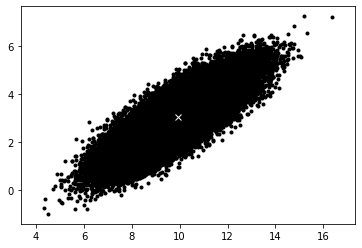

In [90]:
plt.plot(samples[:,0], samples[:,1], 'k.')
plt.plot(mean_val[0], mean_val[1], 'wx')
plt.axis('equal')

(-2.9187866417618182,
 17.294519476998182,
 -1.4255704670854012,
 7.663256138730291)

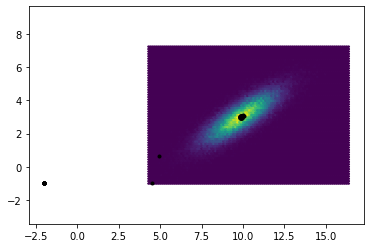

In [101]:
plt.hexbin(samples[:,0], samples[:,1])
plt.plot(mean_val[0], mean_val[1], 'ko')
plt.plot(res[:,0], res[:,1], 'k.')
plt.axis('equal')

In [99]:
logpdf = True
sizes = np.arange(0, 100000, 5000)[1:]
residuals = []
for size in tqdm(sizes):
    subsample_idxs = np.random.randint(0,len(samples) -1, size=size)
    subsample = samples[subsample_idxs]
    KDE = gaussian_kde(subsample)
    jac = lambda x: -KDE.grad(x, logpdf=logpdf)
    objective = lambda x: -KDE(x, logpdf=logpdf)
    res = minimize(objective, [-2,-1], jac=jac, tol=1e-8)
    residuals.append(res.x)
res = np.asarray(residuals)
res_nrm = np.linalg.norm(res, axis=1)

100%|██████████| 19/19 [00:01<00:00, 12.67it/s]


(5000.0, 95000.0)

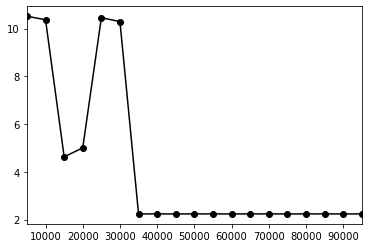

In [100]:
plt.plot(sizes, res_nrm, 'k-')
plt.plot(sizes, res_nrm, 'ko')
plt.xlim(sizes[0], sizes[-1])

(5000.0, 95000.0)

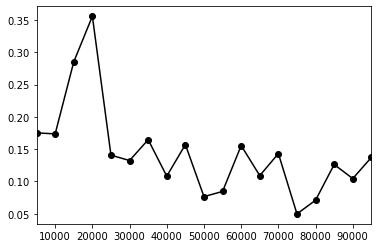

In [81]:
plt.plot(sizes, res_nrm, 'k-')
plt.plot(sizes, res_nrm, 'ko')
plt.xlim(sizes[0], sizes[-1])

In [4]:
def test_gaussian_kde(n_centers = 1000, n_dims = 3, n_pts = 1000, logpdf = False):
    """Sample test, will always pass so long as import statement worked."""
    rand_dataset = np.random.rand(n_centers, n_dims)
    rand_points = np.random.rand(n_pts, n_dims)

    #Test 
    KDE = gaussian_kde(rand_dataset)
    if logpdf:
        return KDE.logpdf(rand_points)
    else:
        return KDE(rand_points)

In [28]:
n_centers_vals = np.arange(1000,30000,1000)
time_log = []
time_std = []
for n_centers in n_centers_vals:
    val = %timeit -o test_gaussian_kde(n_centers = n_centers, n_dims = 3, n_pts = 1, logpdf = False)
    time_std.append(mean(val.timings))
    val = %timeit -o test_gaussian_kde(n_centers = n_centers, n_dims = 3, n_pts = 1, logpdf = True)
    time_log.append(mean(val.timings))


1.02 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
937 µs ± 82.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.61 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.49 ms ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.14 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.14 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.61 ms ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.54 ms ± 62.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.04 ms ± 86.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.09 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.6 ms ± 52.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.71 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.04 ms ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.08 ms ± 54.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops 

(1000.0, 29000.0)

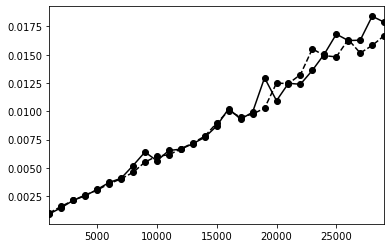

In [29]:
plt.plot(n_centers_vals, time_log, 'k-')
plt.plot(n_centers_vals, time_log, 'ko')
plt.plot(n_centers_vals, time_std, 'k--')
plt.plot(n_centers_vals, time_std, 'ko')
plt.xlim(n_centers_vals[0], n_centers_vals[-1])

In [21]:
time_log

[0.00043302389742861383]